In [3]:
import pandas as pd
uriage_data = pd.read_csv("data/uriage.csv")
uriage_data.head()

,purchase_date,item_name,item_price,customer_name
0,2019-06-13 18:02:34,商品A,100.0,深井菜々美
1,2019-07-13 13:05:29,商 品 S,NaN,浅田賢二
2,2019-05-11 19:42:07,商 品 a,NaN,南部慶二
3,2019-02-12 23:40:45,商品Z,2600.0,麻生莉緒
4,2019-04-22 03:09:35,商品a,NaN,平田鉄二


In [4]:
kokyaku_data = pd.read_excel("data/kokyaku_daicho.xlsx")
kokyaku_data.head()

,顧客名,かな,地域,メールアドレス,登録日
0,須賀ひとみ,すが ひとみ,H市,suga_hitomi@example.com,2018/01/04
1,岡田 敏也,おかだ としや,E市,okada_toshiya@example.com,42782
2,芳賀 希,はが のぞみ,A市,haga_nozomi@example.com,2018/01/07
3,荻野 愛,おぎの あい,F市,ogino_ai@example.com,42872
4,栗田 憲一,くりた けんいち,E市,kurita_kenichi@example.com,43127


In [5]:
kokyaku_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
顧客名        200 non-null object
かな         200 non-null object
地域         200 non-null object
メールアドレス    200 non-null object
登録日        200 non-null object
dtypes: object(5)
memory usage: 7.9+ KB


In [6]:
uriage_data["item_name"]

0         商品A
1       商 品 S
2       商 品 a
3         商品Z
4         商品a
5         商品S
6        商品 a
7         商品V
8         商品O
9         商品A
10       商 品U
11        商品L
12      商  品V
13       商 品O
14        商品A
15        商品C
16        商品V
17        商品I
18        商品r
19        商品X
20        商品O
21       商品 g
22        商品X
23        商品R
24        商品P
25        商品Q
26        商品y
27        商品P
28        商品P
29        商品R
        ...  
2969      商品O
2970      商品L
2971      商品S
2972      商品R
2973      商品A
2974      商品P
2975      商品Y
2976      商品L
2977      商品X
2978      商品N
2979      商品N
2980      商品P
2981      商品R
2982      商品L
2983      商品H
2984      商品G
2985      商品X
2986      商品C
2987      商品K
2988      商品R
2989      商品M
2990      商品O
2991      商品W
2992      商品C
2993      商品C
2994      商品Y
2995      商品M
2996      商品Q
2997      商品H
2998      商品D
Name: item_name, Length: 2999, dtype: object

In [7]:
uriage_data["purchase_date"] = pd.to_datetime(uriage_data["purchase_date"])
uriage_data["purchase_month"] = uriage_data["purchase_date"].dt.strftime("%Y%m")

In [8]:
res = uriage_data.pivot_table(index="purchase_month",columns="item_name",aggfunc="size",fill_value=0)
res.head()

item_name,商品W,商 品 n,商品E,商品M,商品P,商品S,商品W,商品X,商 品O,商 品Q,...,商品k,商品l,商品o,商品p,商品r,商品s,商品t,商品v,商品x,商品y
purchase_month,,,,,,,,,,,,,,,,,,,,,
201901,0,1,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
201902,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,1,1,0,0
201903,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
201904,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
201905,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [9]:
uriage_data["item_name"] = uriage_data["item_name"].str.upper()

In [10]:
uriage_data["item_name"] = uriage_data["item_name"].str.replace("　","")
uriage_data["item_name"] = uriage_data["item_name"].str.replace(" ","")

In [11]:
uriage_data.sort_values(by=["item_name"],ascending=True)
uriage_data["item_name"].value_counts()

商品S    140
商品A    139
商品R    136
商品P    135
商品V    134
商品C    133
商品F    126
商品Q    125
商品D    125
商品O    124
商品W    121
商品N    119
商品T    117
商品X    116
商品J    116
商品I    114
商品M    113
商品B    113
商品L    110
商品G    110
商品K    109
商品H    109
商品U    107
商品E    105
商品Y    102
商品Z      1
Name: item_name, dtype: int64

In [12]:
uriage_data.isnull().any(axis=0)

purchase_date     False
item_name         False
item_price         True
customer_name     False
purchase_month    False
dtype: bool

In [13]:
flg_is_null = uriage_data["item_price"].isnull()
print(flg_is_null)

0       False
1        True
2        True
3       False
4        True
5       False
6        True
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14       True
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28       True
29      False
        ...  
2969    False
2970    False
2971    False
2972    False
2973    False
2974    False
2975    False
2976    False
2977     True
2978    False
2979    False
2980    False
2981    False
2982    False
2983    False
2984    False
2985    False
2986    False
2987     True
2988    False
2989    False
2990     True
2991    False
2992     True
2993    False
2994    False
2995    False
2996     True
2997     True
2998    False
Name: item_price, Length: 2999, dtype: bool


In [14]:
for trg in list(uriage_data.loc[flg_is_null,"item_name"].unique()):
    price = uriage_data.loc[(~flg_is_null) & (uriage_data["item_name"] == trg),"item_price"].max()
    uriage_data["item_price"].loc[(flg_is_null) & (uriage_data["item_name"]==trg)] = price

/Users/wataru/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [15]:
uriage_data.head()

,purchase_date,item_name,item_price,customer_name,purchase_month
0,2019-06-13 18:02:34,商品A,100.0,深井菜々美,201906
1,2019-07-13 13:05:29,商品S,1900.0,浅田賢二,201907
2,2019-05-11 19:42:07,商品A,100.0,南部慶二,201905
3,2019-02-12 23:40:45,商品Z,2600.0,麻生莉緒,201902
4,2019-04-22 03:09:35,商品A,100.0,平田鉄二,201904


In [16]:
uriage_data.isnull().any(axis=0)

purchase_date     False
item_name         False
item_price        False
customer_name     False
purchase_month    False
dtype: bool

In [17]:
kokyaku_data["顧客名"] = kokyaku_data["顧客名"].str.replace("　","")
kokyaku_data["顧客名"] = kokyaku_data["顧客名"].str.replace(" ","")

In [18]:
flg_is_serial = kokyaku_data["登録日"].astype("str").str.isdigit()
flg_is_serial.sum()

22

In [19]:
fromSerial = pd.to_timedelta(kokyaku_data.loc[flg_is_serial,"登録日"].astype("float"),unit="D") + pd.to_datetime("1900/01/01")

In [20]:
fromString = pd.to_datetime(kokyaku_data.loc[~flg_is_serial,"登録日"])

In [21]:
kokyaku_data["登録日"] = pd.concat([fromSerial,fromString])

In [22]:
kokyaku_data.head()

,顧客名,かな,地域,メールアドレス,登録日
0,須賀ひとみ,すが ひとみ,H市,suga_hitomi@example.com,2018-01-04
1,岡田敏也,おかだ としや,E市,okada_toshiya@example.com,2017-02-18
2,芳賀希,はが のぞみ,A市,haga_nozomi@example.com,2018-01-07
3,荻野愛,おぎの あい,F市,ogino_ai@example.com,2017-05-19
4,栗田憲一,くりた けんいち,E市,kurita_kenichi@example.com,2018-01-29


In [23]:
uriage_data.head()

,purchase_date,item_name,item_price,customer_name,purchase_month
0,2019-06-13 18:02:34,商品A,100.0,深井菜々美,201906
1,2019-07-13 13:05:29,商品S,1900.0,浅田賢二,201907
2,2019-05-11 19:42:07,商品A,100.0,南部慶二,201905
3,2019-02-12 23:40:45,商品Z,2600.0,麻生莉緒,201902
4,2019-04-22 03:09:35,商品A,100.0,平田鉄二,201904


In [24]:
kokyaku_data.head()

,顧客名,かな,地域,メールアドレス,登録日
0,須賀ひとみ,すが ひとみ,H市,suga_hitomi@example.com,2018-01-04
1,岡田敏也,おかだ としや,E市,okada_toshiya@example.com,2017-02-18
2,芳賀希,はが のぞみ,A市,haga_nozomi@example.com,2018-01-07
3,荻野愛,おぎの あい,F市,ogino_ai@example.com,2017-05-19
4,栗田憲一,くりた けんいち,E市,kurita_kenichi@example.com,2018-01-29


In [25]:
join_data = pd.merge(uriage_data,kokyaku_data,left_on="customer_name",right_on="顧客名",how="left")
join_data.head()

,purchase_date,item_name,item_price,customer_name,purchase_month,顧客名,かな,地域,メールアドレス,登録日
0,2019-06-13 18:02:34,商品A,100.0,深井菜々美,201906,深井菜々美,ふかい ななみ,C市,fukai_nanami@example.com,2017-01-26
1,2019-07-13 13:05:29,商品S,1900.0,浅田賢二,201907,浅田賢二,あさだ けんじ,C市,asada_kenji@example.com,2018-04-07
2,2019-05-11 19:42:07,商品A,100.0,南部慶二,201905,南部慶二,なんぶ けいじ,A市,nannbu_keiji@example.com,2018-06-19
3,2019-02-12 23:40:45,商品Z,2600.0,麻生莉緒,201902,麻生莉緒,あそう りお,D市,asou_rio@example.com,2018-07-22
4,2019-04-22 03:09:35,商品A,100.0,平田鉄二,201904,平田鉄二,ひらた てつじ,D市,hirata_tetsuji@example.com,2017-06-07


In [26]:
join_data = join_data.drop("customer_name",axis=1)

In [27]:
join_data["purchase_date"] = pd.to_datetime(join_data["purchase_date"])
join_data["purchase_month"] = join_data["purchase_date"].dt.strftime("%Y%m")

In [28]:
dump_data = join_data[["purchase_date","purchase_month","item_name","item_price","顧客名","かな","地域","メールアドレス","登録日"]]

In [29]:
dump_data.head()

,purchase_date,purchase_month,item_name,item_price,顧客名,かな,地域,メールアドレス,登録日
0,2019-06-13 18:02:34,201906,商品A,100.0,深井菜々美,ふかい ななみ,C市,fukai_nanami@example.com,2017-01-26
1,2019-07-13 13:05:29,201907,商品S,1900.0,浅田賢二,あさだ けんじ,C市,asada_kenji@example.com,2018-04-07
2,2019-05-11 19:42:07,201905,商品A,100.0,南部慶二,なんぶ けいじ,A市,nannbu_keiji@example.com,2018-06-19
3,2019-02-12 23:40:45,201902,商品Z,2600.0,麻生莉緒,あそう りお,D市,asou_rio@example.com,2018-07-22
4,2019-04-22 03:09:35,201904,商品A,100.0,平田鉄二,ひらた てつじ,D市,hirata_tetsuji@example.com,2017-06-07


In [30]:
dump_data.to_csv("dump_data.csv", index=False)

In [31]:
in_data = pd.read_csv("data/dump_data.csv")
in_data.head()
in_data.isnull().any(axis=0)

purchase_date     False
purchase_month    False
item_name         False
item_price        False
顧客名               False
かな                False
地域                False
メールアドレス           False
登録日               False
dtype: bool

In [32]:
pv1 = in_data.pivot_table(values = "item_price", index="purchase_month", columns="地域", aggfunc="sum")
pv1.head()

地域,A市,B市,C市,D市,E市,F市,G市,H市
purchase_month,,,,,,,,
201901,81100.0,72500.0,79900.0,39000.0,67900.0,73000.0,64000.0,55000.0
201902,89600.0,61100.0,85100.0,64400.0,83800.0,64600.0,57200.0,93700.0
201903,76100.0,69300.0,74700.0,64700.0,66700.0,72000.0,68300.0,79900.0
201904,90600.0,58800.0,68100.0,53000.0,54100.0,81800.0,48800.0,63800.0
201905,65700.0,74600.0,83500.0,59400.0,78200.0,83800.0,44900.0,61700.0


In [33]:
pv1.corr()

地域,A市,B市,C市,D市,E市,F市,G市,H市
地域,,,,,,,,
A市,1.000000,-0.134955,-0.171507,0.122649,-0.164769,-0.110400,0.003217,0.213518
B市,-0.134955,1.000000,0.276896,0.148020,0.325028,0.422223,-0.233553,-0.448556
C市,-0.171507,0.276896,1.000000,0.010221,0.871252,-0.434178,0.139567,0.299455
D市,0.122649,0.148020,0.010221,1.000000,0.439317,0.133974,-0.461667,0.554383
E市,-0.164769,0.325028,0.871252,0.439317,1.000000,-0.300008,-0.181834,0.449235
F市,-0.110400,0.422223,-0.434178,0.133974,-0.300008,1.000000,-0.747297,-0.700251
G市,0.003217,-0.233553,0.139567,-0.461667,-0.181834,-0.747297,1.000000,0.276985
H市,0.213518,-0.448556,0.299455,0.554383,0.449235,-0.700251,0.276985,1.000000


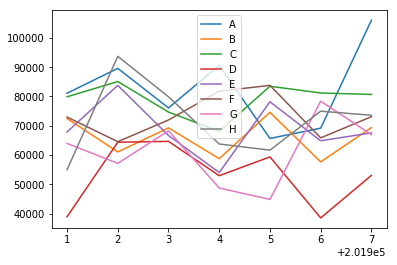

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(list(pv1.index), pv1["A市"],label="A")
plt.plot(list(pv1.index), pv1["B市"],label="B")
plt.plot(list(pv1.index), pv1["C市"],label="C")
plt.plot(list(pv1.index), pv1["D市"],label="D")
plt.plot(list(pv1.index), pv1["E市"],label="E")
plt.plot(list(pv1.index), pv1["F市"],label="F")
plt.plot(list(pv1.index), pv1["G市"],label="G")
plt.plot(list(pv1.index), pv1["H市"],label="H")
plt.legend()

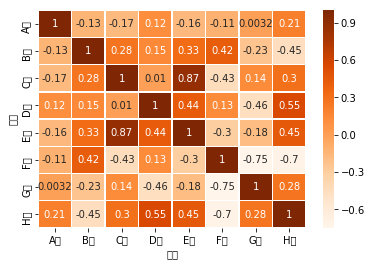

In [35]:
import seaborn as sns
sns.heatmap(pv1.corr(), annot=True, cmap='Oranges', linewidths=.5)

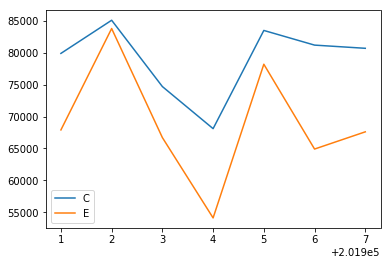

In [36]:
plt.plot(list(pv1.index), pv1["C市"],label="C")
plt.plot(list(pv1.index), pv1["E市"],label="E")
plt.legend()

In [37]:
in_data.head()

,purchase_date,purchase_month,item_name,item_price,顧客名,かな,地域,メールアドレス,登録日
0,2019-06-13 18:02:34,201906,商品A,100.0,深井菜々美,ふかい ななみ,C市,fukai_nanami@example.com,2017-01-26 00:00:00
1,2019-07-13 13:05:29,201907,商品S,1900.0,浅田賢二,あさだ けんじ,C市,asada_kenji@example.com,2018-04-07 00:00:00
2,2019-05-11 19:42:07,201905,商品A,100.0,南部慶二,なんぶ けいじ,A市,nannbu_keiji@example.com,2018-06-19 00:00:00
3,2019-02-12 23:40:45,201902,商品Z,2600.0,麻生莉緒,あそう りお,D市,asou_rio@example.com,2018-07-22 00:00:00
4,2019-04-22 03:09:35,201904,商品A,100.0,平田鉄二,ひらた てつじ,D市,hirata_tetsuji@example.com,2017-06-07 00:00:00


In [41]:
in_data["顧客名"].value_counts().head()

島袋友以乃    26
矢部美幸     26
石川まさみ    25
戸塚美幸     24
河内さとみ    24
Name: 顧客名, dtype: int64

In [45]:
df = in_data[["顧客名","item_name","purchase_date"]]
df = df.sort_values(["顧客名", "purchase_date"],ascending=[True,True])
df["customer"] = df["顧客名"]

,顧客名,item_name,purchase_date,customer
247,さだ千佳子,商品U,2019-01-03 14:55:35,さだ千佳子
2622,さだ千佳子,商品L,2019-01-07 16:25:47,さだ千佳子
1952,さだ千佳子,商品H,2019-01-23 07:52:37,さだ千佳子
857,さだ千佳子,商品Q,2019-02-01 09:43:19,さだ千佳子
576,さだ千佳子,商品E,2019-02-04 22:08:57,さだ千佳子


In [48]:
df = df[["customer", "item_name"]]
df.head()

,customer,item_name
247,さだ千佳子,商品U
2622,さだ千佳子,商品L
1952,さだ千佳子,商品H
857,さだ千佳子,商品Q
576,さだ千佳子,商品E


In [50]:
df["item_name"] = df["item_name"].astype(str)

In [51]:
df = df.groupby(["customer"])["item_name"].apply(lambda x:list(x)).reset_index()
df.head()

,customer,item_name
0,さだ千佳子,"[商品U, 商品L, 商品H, 商品Q, 商品E, 商品V, 商品K, 商品E, 商品F, ..."
1,中仁晶,"[商品L, 商品P, 商品M, 商品F, 商品O, 商品R, 商品C, 商品D, 商品X, ..."
2,中田美智子,"[商品S, 商品K, 商品T, 商品V, 商品I, 商品L, 商品Q, 商品R, 商品P, ..."
3,丸山光臣,"[商品I, 商品W, 商品F, 商品N, 商品P, 商品Q, 商品Q, 商品A, 商品W, ..."
4,久保田倫子,"[商品O, 商品Q, 商品E, 商品U, 商品U, 商品K, 商品V, 商品K, 商品S, ..."


In [52]:
def get_combination(l):
    length = len(l)
    list_output = []
    list_pair = []
    for i in range(length-1):
        if l[i]==l[i+1]:
            pass
        else:
            list_pair =[l[i],l[i+1]]
            list_output.append(list_pair)
    return list_output

df["comb_goods_id"] = df["item_name"].apply(lambda x:get_combination(x))

#アソシエーション入力のリストを作る
dataset= []
for i,contents in enumerate(df["comb_goods_id"].values):
    for c in contents:
        dataset.append(c)

print("XYのペアの数は",len(dataset))
print("XYのペアの中身",dataset[:5])

XYのペアの数は 2680
XYのペアの中身 [['商品U', '商品L'], ['商品L', '商品H'], ['商品H', '商品Q'], ['商品Q', '商品E'], ['商品E', '商品V']]


In [53]:
#アソシエーションライブラリ
def association(dataset):
    df = pd.DataFrame(dataset,columns=["x","y"])
    num_dataset = df.shape[0]
    df["sum_count_xy"]=1
    print("calculating support....")
    df_a_support = (df.groupby("x").sum()/num_dataset).rename(columns={"sum_count_xy":"support_x"})
    df_b_support = (df.groupby("y").sum()/num_dataset).rename(columns={"sum_count_xy":"support_y"})
    df = df.groupby(["x","y"]).sum()
    df["support_xy"]=df["sum_count_xy"]/num_dataset
    df = df.reset_index()
    df = pd.merge(df,df_a_support,on="x")
    df = pd.merge(df,df_b_support,on="y")
    print("calculating confidence....")
    df_temp = df.groupby("x").sum()[["sum_count_xy"]].rename(columns={"sum_count_xy":"sum_count_x"})
    df = pd.merge(df,df_temp,on="x")
    df_temp = df.groupby("y").sum()[["sum_count_xy"]].rename(columns={"sum_count_xy":"sum_count_y"})
    df = pd.merge(df,df_temp,on="y")
    df["confidence"]=df["sum_count_xy"]/df["sum_count_x"]
    print("calculating lift....")
    df["lift"]=df["confidence"]/df["support_y"]
    df["sum_count"] = num_dataset
    df_output = df
    return df_output

In [54]:
df_output = association(dataset)
df_output.head()

calculating support....
calculating confidence....
calculating lift....


,x,y,sum_count_xy,support_xy,support_x,support_y,sum_count_x,sum_count_y,confidence,lift,sum_count
0,商品A,商品B,4,0.001493,0.046642,0.038433,125,103,0.032000,0.832621,2680
1,商品C,商品B,3,0.001119,0.043657,0.038433,117,103,0.025641,0.667165,2680
2,商品D,商品B,3,0.001119,0.042164,0.038433,113,103,0.026549,0.690781,2680
3,商品E,商品B,4,0.001493,0.033955,0.038433,91,103,0.043956,1.143711,2680
4,商品F,商品B,2,0.000746,0.041418,0.038433,111,103,0.018018,0.468818,2680


In [57]:
df_output.describe()

,sum_count_xy,support_xy,support_x,support_y,sum_count_x,sum_count_y,confidence,lift,sum_count
count,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000,597.000000,597.0
mean,4.489112,0.001675,0.039913,0.039937,106.968174,107.031826,0.043551,1.139670,2680.0
std,2.108301,0.000787,0.003734,0.003794,10.006407,10.168744,0.043820,1.624862,0.0
min,1.000000,0.000373,0.000373,0.000373,1.000000,1.000000,0.008197,0.206281,2680.0
25%,3.000000,0.001119,0.037313,0.037687,100.000000,101.000000,0.028571,0.718691,2680.0
50%,4.000000,0.001493,0.039179,0.039552,105.000000,106.000000,0.040000,1.000597,2680.0
75%,6.000000,0.002239,0.042164,0.041418,113.000000,111.000000,0.053097,1.354447,2680.0
max,13.000000,0.004851,0.046642,0.048507,125.000000,130.000000,1.000000,29.450549,2680.0


In [62]:
df = df_output.copy()
df = df[df["support_xy"]>=df["support_xy"].quantile(0.98)]

In [63]:
df = df[df["lift"]>=2.0]
df = df.sort_values("lift",ascending=False)
df

,x,y,sum_count_xy,support_xy,support_x,support_y,sum_count_x,sum_count_y,confidence,lift,sum_count
70,商品Y,商品D,13,0.004851,0.035448,0.041418,95,111,0.136842,3.303936,2680
574,商品E,商品A,11,0.004104,0.033955,0.048507,91,130,0.120879,2.491970,2680
29,商品H,商品C,10,0.003731,0.036940,0.041791,99,112,0.101010,2.417027,2680
343,商品L,商品P,11,0.004104,0.037687,0.045149,101,121,0.108911,2.412241,2680
277,商品Q,商品M,10,0.003731,0.040672,0.038060,109,102,0.091743,2.410505,2680
291,商品G,商品N,10,0.003731,0.038433,0.040299,103,108,0.097087,2.409205,2680
414,商品K,商品S,11,0.004104,0.037313,0.045896,100,123,0.110000,2.396748,2680
41,商品T,商品C,10,0.003731,0.038806,0.041791,104,112,0.096154,2.300824,2680
383,商品D,商品R,11,0.004104,0.042164,0.044776,113,120,0.097345,2.174041,2680
349,商品S,商品P,12,0.004478,0.046269,0.045149,124,121,0.096774,2.143428,2680
